In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import os
import pickle

### NOTE - 
Run the following code only once at the starting of the project 

In [ ]:
# Importing and saving the data
def save():
    # Move to the main directory of the project
    #os.chdir("..")
    file_path = os.path.abspath(os.curdir)
    file_path_data = os.path.join(file_path, 'data/') # file path containing the dataset
    file_names = os.listdir(file_path_data) # dataset file names
    print('Reading from', file_path_data)

    # Creating the data frames of the data present
    print('Creating dataframes...')
    customer_data = pd.read_excel(os.path.join(file_patclh_data, file_names[0]))
    final_invoice = pd.read_csv(os.path.join(file_path_data, file_names[1]))
    jtd = pd.read_csv(os.path.join(file_path_data, file_names[2]))
    plant_master = pd.read_excel(os.path.join(file_path_data, file_names[4]))

    # Saving the pickle files of the dataframes for fast importing of the data
    print('Saving the pickled files...')
    customer_data.to_pickle(os.path.join(file_path , r'pickled\customer_data.pkl'))
    final_invoice.to_pickle(os.path.join(file_path , r'pickled\final_invoice.pkl'))
    jtd.to_pickle(os.path.join(file_path , r'pickled\jtd.pkl'))
    plant_master.to_pickle(os.path.join(file_path , r'pickled\plant_master.pkl'))

save()

In [3]:
# Loading the pickled data
customer_data = pd.read_pickle(r'pickled\customer_data.pkl')
final_invoice = pd.read_pickle(r'pickled\final_invoice.pkl')
jtd = pd.read_pickle(r'pickled\jtd.pkl')
plant_master = pd.read_pickle(r'pickled/plant_master.pkl')

In [10]:
top_50_model = final_invoice[['Customer No.', 'Model']]

In [11]:
grouped_top_50_model = top_50_model.groupby('Model').count()
grouped_top_50_model.columns = ['No. of Customers']
sorted_top_50_model = grouped_top_50_model.sort_values('No. of Customers', ascending=False)

In [12]:
sorted_top_50_model.reset_index(inplace=True)
temp0= sorted_top_50_model.loc[:50]

<IPython.core.display.Javascript object>


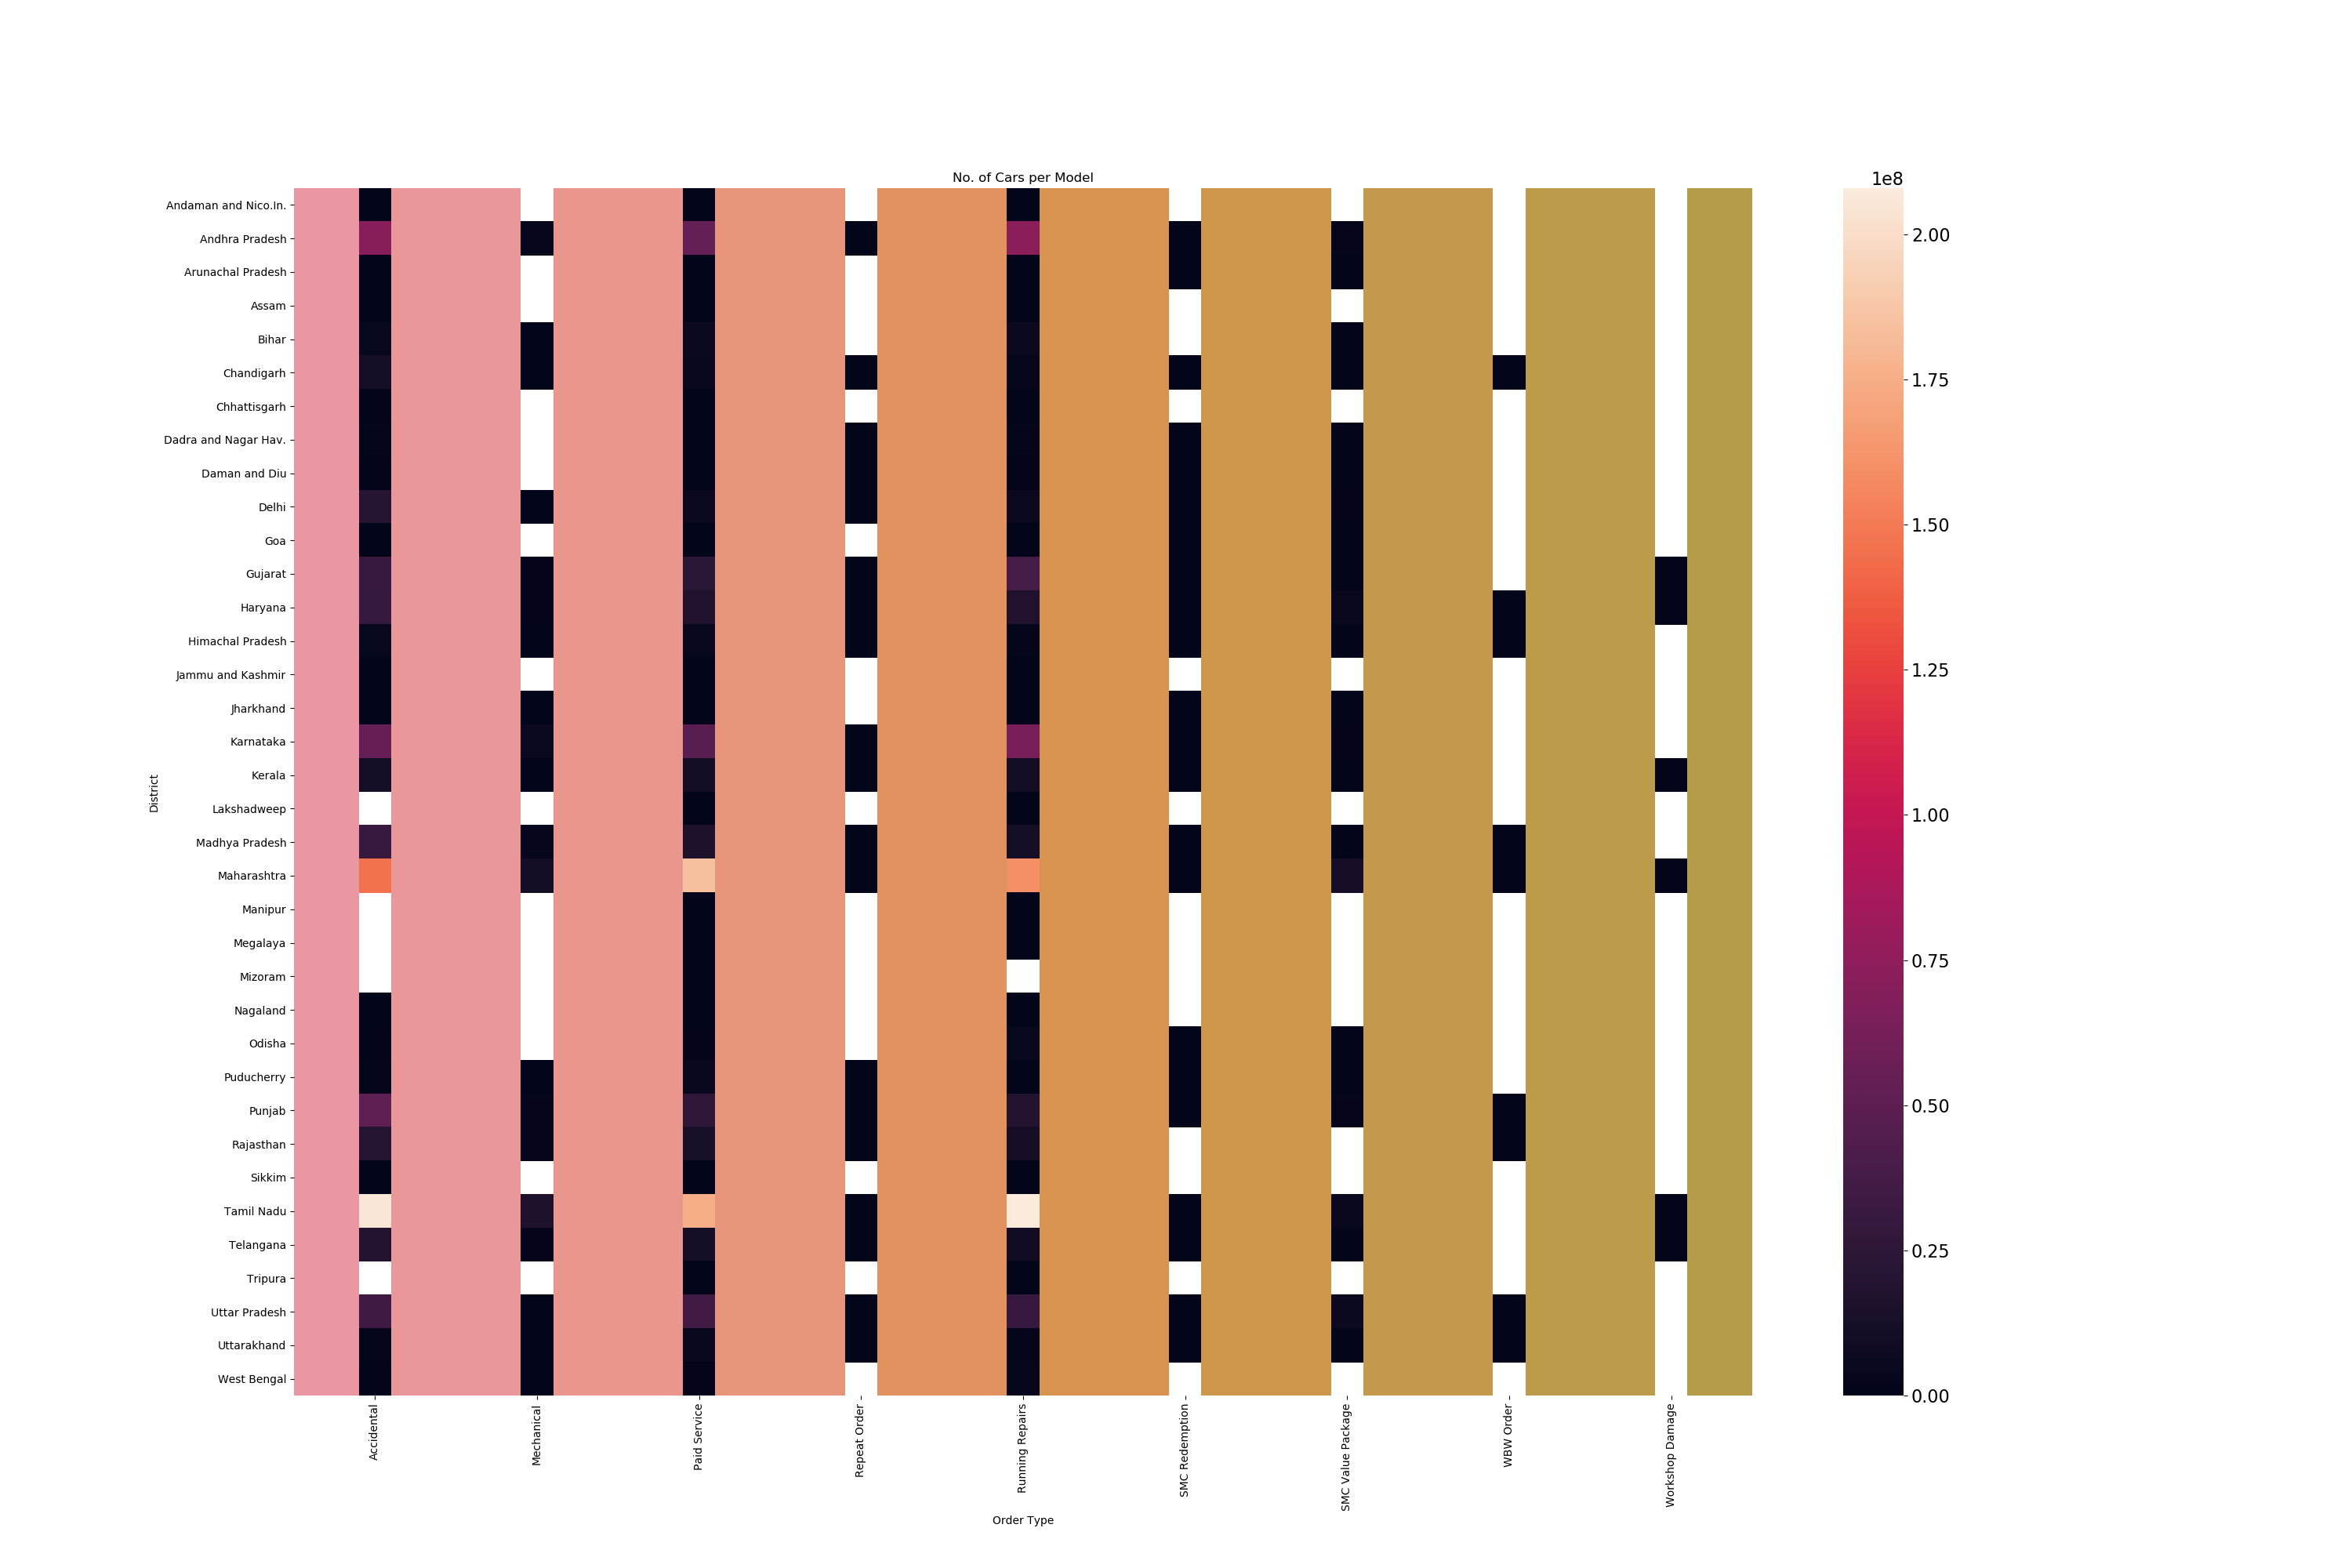

In [13]:
fig, ax = plt.subplots(figsize=[30, 20])
sns.barplot(x="Model", y="No. of Customers", data=temp0, ax=ax)
ax.set_title("No. of Cars per Model")
ax.set_xlabel("Models")
ax.set_ylabel("No. of cars")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams.update({'font.size': 16})
plt.savefig(r'images/top_50_model.png')

In [14]:
geo_district = final_invoice[['Customer No.', 'District']]
geo_district = geo_district.groupby('District').count()
geo_district.columns = ['No. of Customers']
sorted_geo_district = geo_district.sort_values('No. of Customers', ascending=False)
sorted_geo_district.reset_index(inplace=True)
temp1 = sorted_geo_district.loc[:50]

In [15]:
temp1.head()

,District,No. of Customers
0,Maharashtra,128119
1,Tamil Nadu,116309
2,Karnataka,44135
3,Andhra Pradesh,40604
4,Uttar Pradesh,31534


In [29]:
geo_district_order = final_invoice[['Customer No.', 'Order Type', 'District']]
geo_district_order = geo_district_order.groupby(['Order Type', 'District']).count()
geo_district_order.columns = ["No. of Customers"]
#sorted_geo_district_order = geo_district_order.sort_values('Order Type', ascending=False)

In [35]:
geo_district_order.sort_values(['Order Type', 'No. of Customers'], ascending=[True, False], inplace=True)

In [46]:
final_invoice['Order Type'].unique()

array(['Paid Service', 'SMC Value Package', 'Running Repairs',
       'SMC Redemption', 'Accidental', 'Repeat Order', 'Workshop Damage',
       'Mechanical', 'WBW Order'], dtype=object)

In [52]:
order_type = ['Paid Service', 'SMC Value Package', 'Running Repairs',
       'SMC Redemption', 'Accidental', 'Repeat Order', 'Workshop Damage',
       'Mechanical', 'WBW Order']
for order in order_type:
    print(order)
    print(geo_district_order.loc[order], "\n")


Paid Service
                      No. of Customers
District                              
Maharashtra                      43842
Tamil Nadu                       28607
Karnataka                        10601
Andhra Pradesh                   10112
Uttar Pradesh                     7723
Gujarat                           6908
Punjab                            5289
Madhya Pradesh                    3964
Haryana                           3514
Rajasthan                         3304
Telangana                         2215
Kerala                            1404
Puducherry                        1318
Bihar                             1201
Himachal Pradesh                   947
Uttarakhand                        930
Delhi                              924
Chandigarh                         862
Odisha                             429
Chhattisgarh                       389
West Bengal                        197
Assam                               80
Dadra and Nagar Hav.                79
Jharkhand   

In [58]:
revenue_order_district = final_invoice[['Order Type', 'District', 'Total Amt Wtd Tax.']]
revenue_order_district = revenue_order_district.groupby(['Order Type', 'District']).sum()
revenue_order_district.columns = ['Rev']
revenue_order_district.reset_index(inplace=True)
temp2 = pd.pivot_table(revenue_order_district, values='Rev', index=['District'], columns='Order Type')

<IPython.core.display.Javascript object>


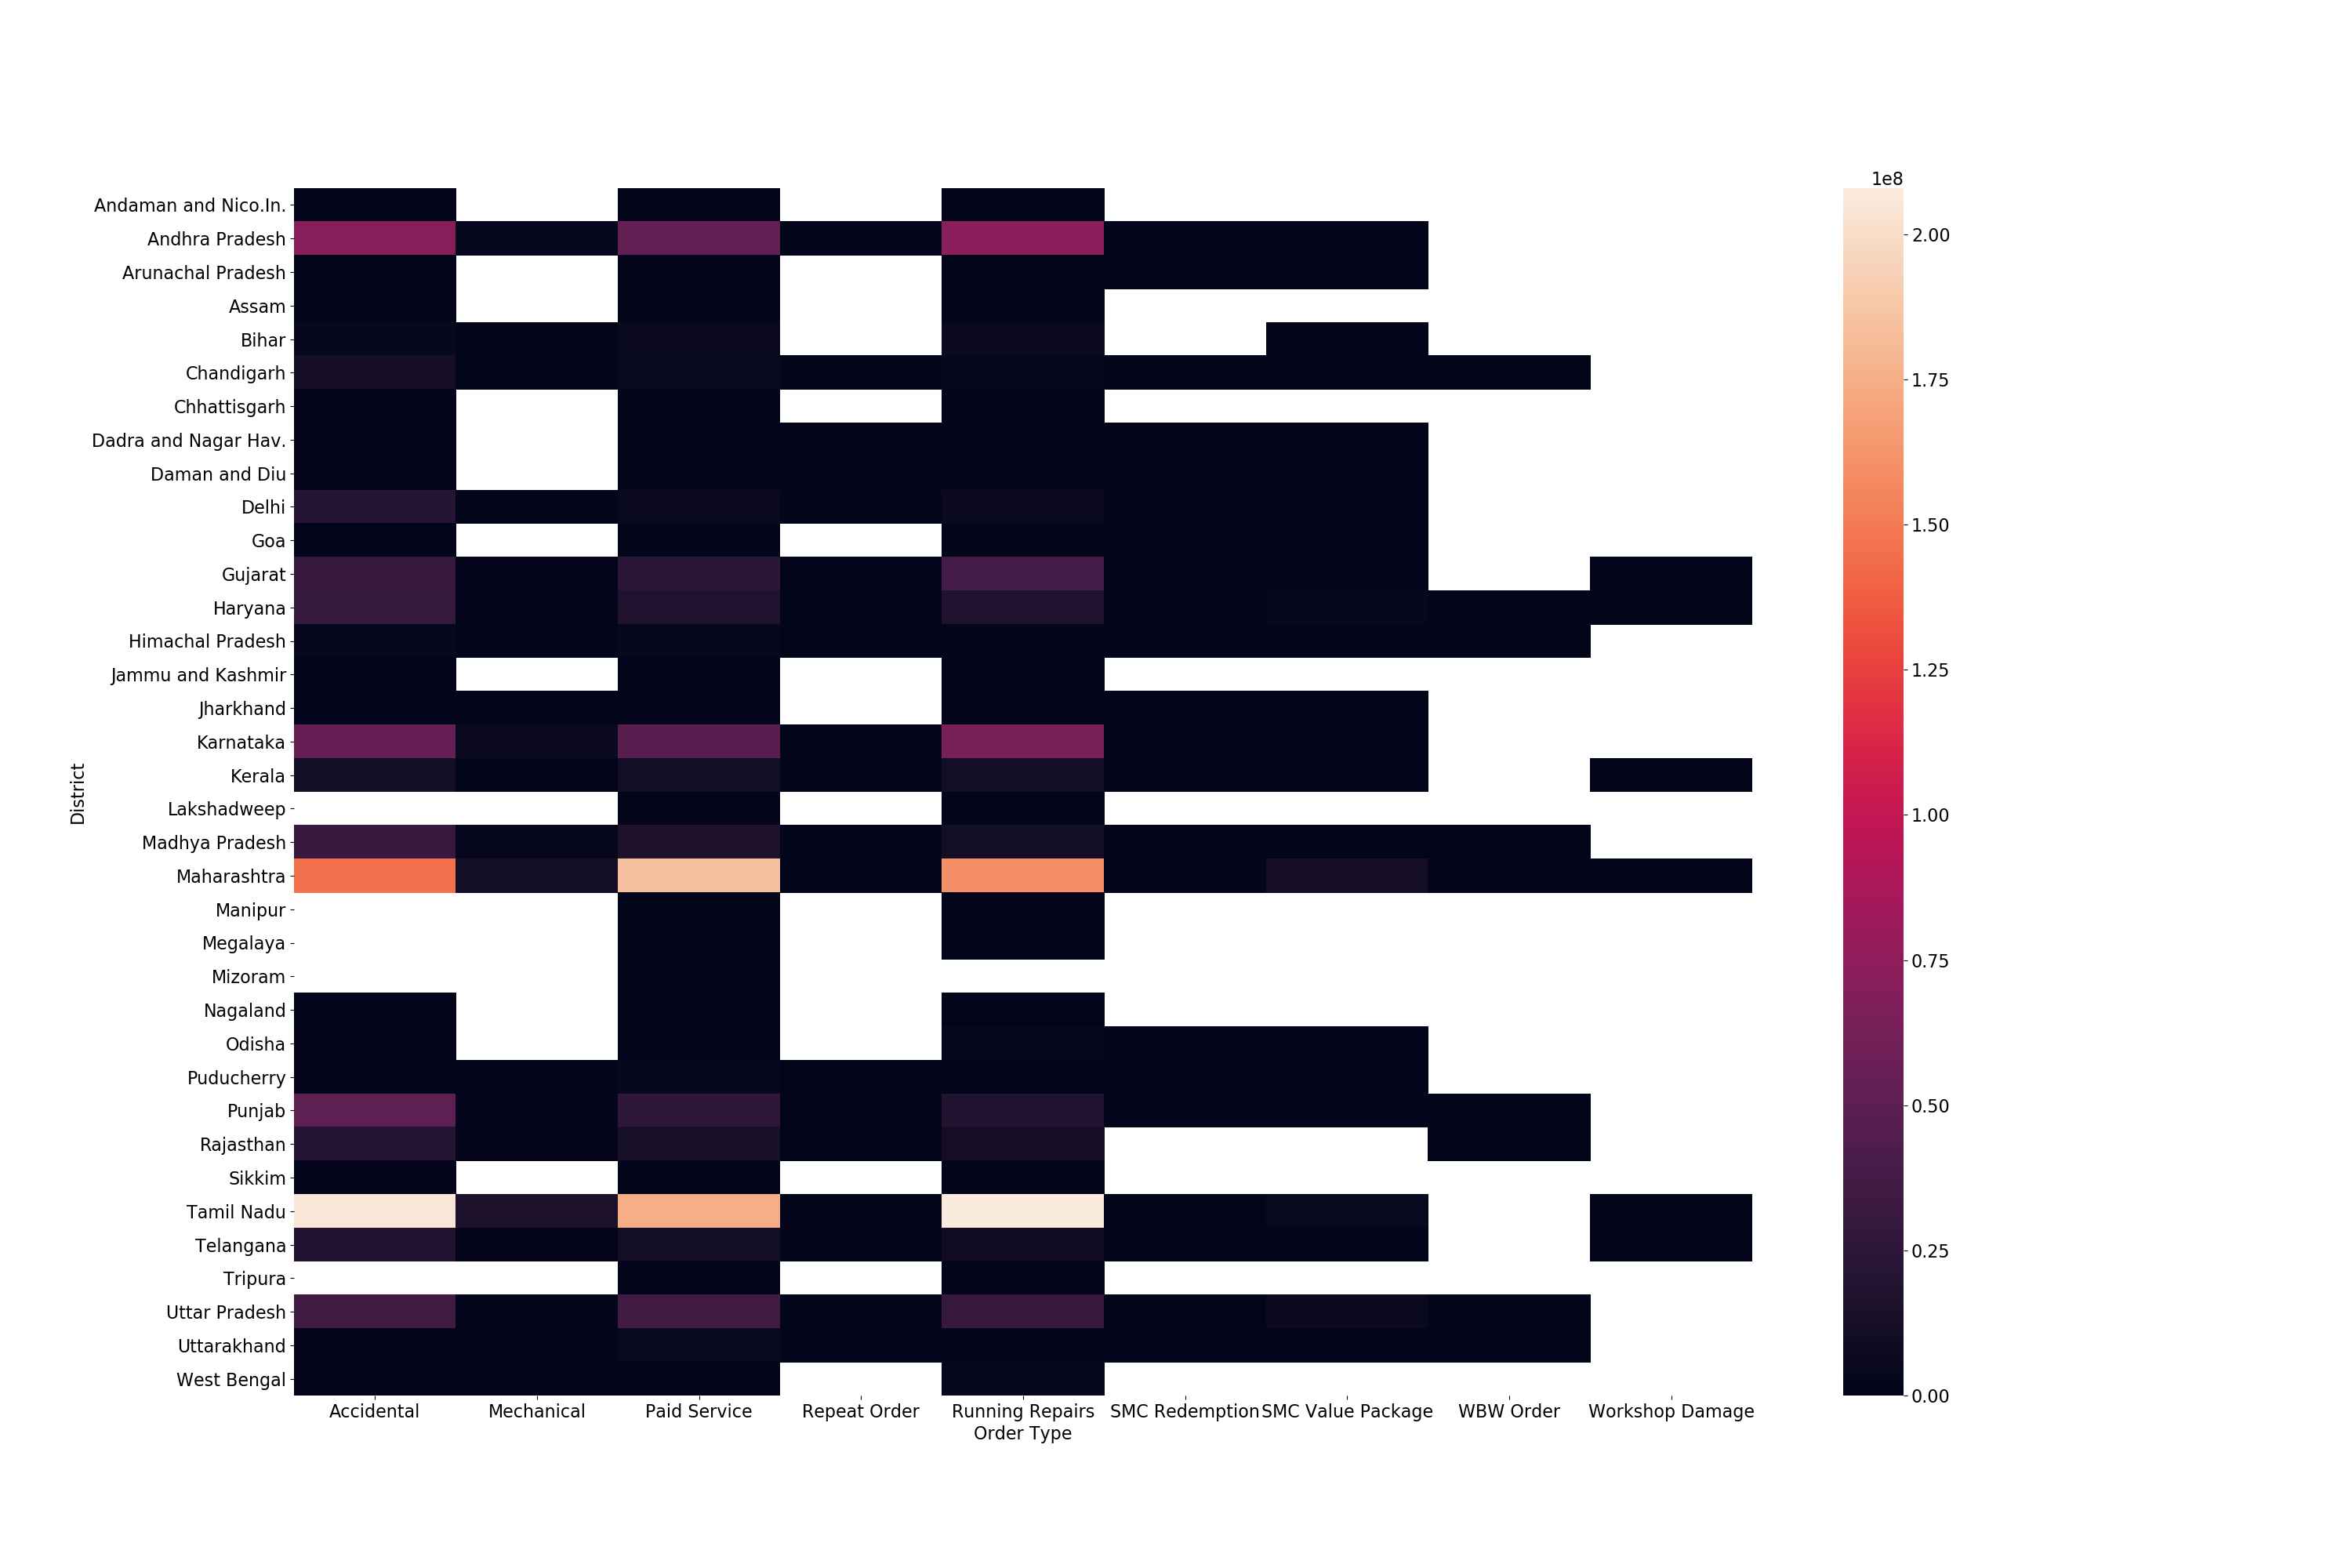

In [61]:
fig, ax = plt.subplots(figsize=[30, 20])
sns.heatmap(temp2)
plt.savefig(r'images/geo_order_heatmap.png')